# Lab: Decision Trees and Random Forests

## Objectives
By the end of this lab, you will:
- Understand how decision trees work and their limitations.
- Observe the instability of decision trees.
- Learn how random forests improve stability and accuracy.
- Implement both models using `scikit-learn`.
- Evaluate performance using cross-validation and feature importance.
- Use cross-validation for hyperparameter selection.


## **1. Introduction**
Decision Trees are powerful models but can be unstable, meaning small variations in data can lead to significantly different trees. Random Forests, an ensemble method, mitigate this issue by averaging multiple decision trees trained on random subsets of data.

### **Dataset: Banknote Authentication**
For this lab, we will use the **Banknote Authentication Dataset**, which contains features extracted from images of banknotes to determine if they are genuine or forged.
- Available on Kaggle: [Banknote Authentication Dataset](https://www.kaggle.com/datasets/ritesaluja/bank-note-authentication-uci-data)
- Features:
  - Variance of wavelet transformed image
  - Skewness of wavelet transformed image
  - Kurtosis of wavelet transformed image
  - Entropy of the image
  - Class label: (0 = Forged, 1 = Genuine)

# 2. Load and Explore the dataset

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Load dataset
df = pd.read_csv("./banknoteauthentication/BankNote_Authentication.csv")  # Replace with actual path

# Check the first few rows
display(df.head())

# Check class distribution
print(df["class"].value_counts())

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


class
0    762
1    610
Name: count, dtype: int64


# 3. Train a Decision Tree Model

In [5]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Split data
X = df.drop(columns=["class"])
y = df["class"]
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Decision Tree model
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

# Evaluate performance
y_pred = dt.predict(X_valid)
dt_accuracy = accuracy_score(y_valid, y_pred)
print(f"Decision Tree Accuracy: {dt_accuracy:.4f}")

Decision Tree Accuracy: 0.9806


# 4. Demonstrate Decision Tree Instability
To show instability, we train multiple trees with different subsets of data and compare them.

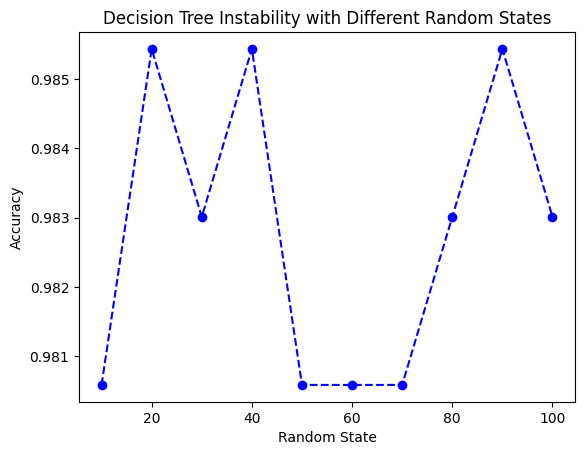

In [6]:
from sklearn.model_selection import cross_val_score

# Train multiple trees with different random states
scores = [DecisionTreeClassifier(random_state=i).fit(X_train, y_train).score(X_valid, y_valid) for i in range(10, 110, 10)]

# Plot the accuracy variation
plt.plot(range(10, 110, 10), scores, marker='o', linestyle='--', color='b')
plt.xlabel("Random State")
plt.ylabel("Accuracy")
plt.title("Decision Tree Instability with Different Random States")
plt.show()

# 5. Train a Random Forest Model

In [7]:
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Evaluate performance
rf_pred = rf.predict(X_valid)
rf_accuracy = accuracy_score(y_valid, rf_pred)
print(f"Random Forest Accuracy: {rf_accuracy:.4f}")

Random Forest Accuracy: 0.9976


# 6. Cross-Validation for Hyperparameter Selection

In [10]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5, 10],
    'n_estimators': [50, 100, 200]
}

# TODO: Perform GridSearchCV with RandomForestClassifier
grid_search = GridSearchCV(
    estimator =RandomForestClassifier(random_state=42),
    param_grid =param_grid,
    cv = 5,
    scoring ='accuracy',
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

print(f"Best parameters: {grid_search.best_params_}")
print(f"Best score: {grid_search.best_score_}")
# Print best parameters
# TODO: Print best parameters and best score

Best parameters: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 50}
Best score: 0.9916666666666666


# 7. Compare Decision Tree vs Random Forest Performance

In [11]:
dt_scores = cross_val_score(DecisionTreeClassifier(random_state=42), X, y, cv=5)
rf_scores = cross_val_score(RandomForestClassifier(n_estimators=100, random_state=42), X, y, cv=5)

print(f"Decision Tree Cross-Val Accuracy: {dt_scores.mean():.4f} ± {dt_scores.std():.4f}")
print(f"Random Forest Cross-Val Accuracy: {rf_scores.mean():.4f} ± {rf_scores.std():.4f}")

Decision Tree Cross-Val Accuracy: 0.9811 ± 0.0071
Random Forest Cross-Val Accuracy: 0.9956 ± 0.0015


# 8. Feature Importance in Random Forests

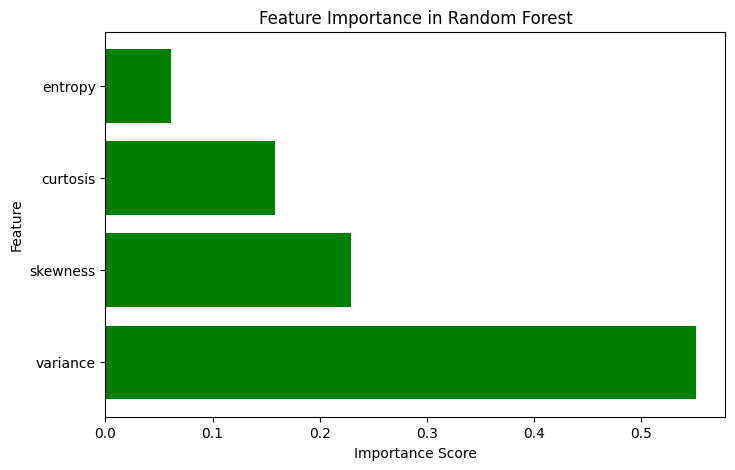

In [12]:
# Extract feature importance
importances = rf.feature_importances_
feature_names = X.columns

# Plot feature importance
plt.figure(figsize=(8, 5))
plt.barh(feature_names, importances, color='green')
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.title("Feature Importance in Random Forest")
plt.show()

## **9. Conclusion**
- **Decision Trees** are simple but unstable, leading to variance in performance.
- **Random Forests** improve stability and accuracy by averaging predictions from multiple trees.
- Feature importance in Random Forests helps identify the most influential features.
- Cross-validation helps tune hyperparameters for better model performance.

### **Further Exploration**
- Try different `max_depth` or `min_samples_split` values in `DecisionTreeClassifier`.

In [19]:
# Create a list of max_depth values to test
max_depths = [3, 5, 10, 15, 20, None]
dt_scores_by_depth = []

In [20]:
for depth in max_depths:
    dt_model = DecisionTreeClassifier(max_depth=depth, random_state=42)
    scores = cross_val_score(dt_model, X, y, cv=5, scoring='accuracy')
    dt_scores_by_depth.append((depth, scores.mean(), scores.std()))

for depth, mean_score, std_score in dt_scores_by_depth:
    depth = str(depth) if depth is not None else "None (unlimited)"

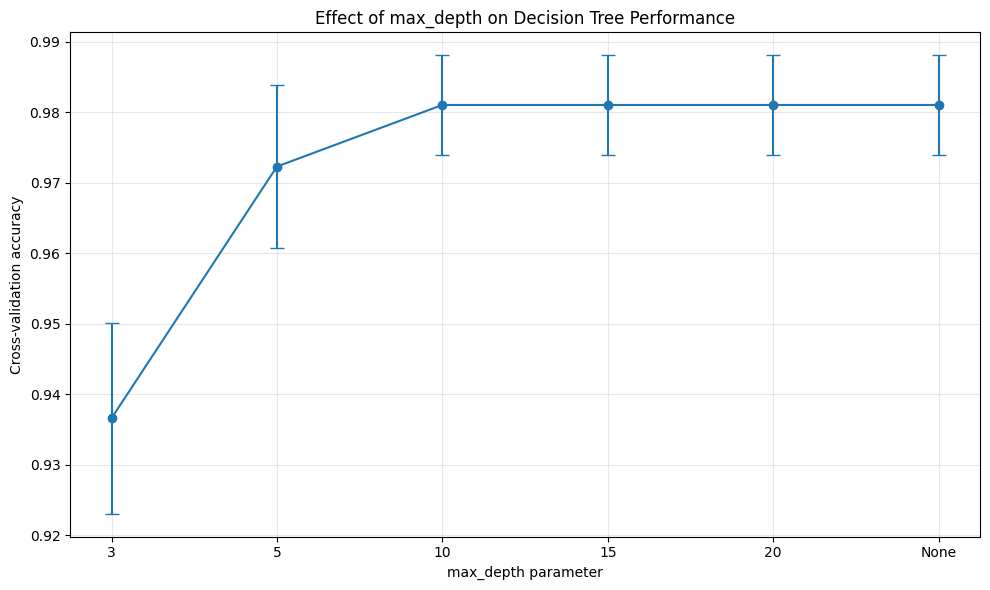

In [21]:
depths_for_plot = [str(d) if d is not None else "None" for d in max_depths]
means = [score[1] for score in dt_scores_by_depth]
stds = [score[2] for score in dt_scores_by_depth]

plt.figure(figsize=(10, 6))
plt.errorbar(depths_for_plot, means, yerr=stds, marker='o', linestyle='-', capsize=5)
plt.xlabel('max_depth parameter')
plt.ylabel('Cross-validation accuracy')
plt.title('Effect of max_depth on Decision Tree Performance')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [22]:
min_samples_values = [2, 5, 10, 20, 50, 100]
dt_scores_by_min_samples = []

In [23]:
for min_samples in min_samples_values:
    dt_model = DecisionTreeClassifier(min_samples_split=min_samples, random_state=42)
    scores = cross_val_score(dt_model, X, y, cv=5, scoring='accuracy')
    dt_scores_by_min_samples.append((min_samples, scores.mean(), scores.std()))
    
# Display results
for min_samples, mean_score, std_score in dt_scores_by_min_samples:
    print(f"Decision Tree with min_samples_split={min_samples}: Accuracy = {mean_score:.4f} ± {std_score:.4f}")

Decision Tree with min_samples_split=2: Accuracy = 0.9811 ± 0.0071
Decision Tree with min_samples_split=5: Accuracy = 0.9811 ± 0.0078
Decision Tree with min_samples_split=10: Accuracy = 0.9825 ± 0.0078
Decision Tree with min_samples_split=20: Accuracy = 0.9796 ± 0.0118
Decision Tree with min_samples_split=50: Accuracy = 0.9541 ± 0.0102
Decision Tree with min_samples_split=100: Accuracy = 0.9402 ± 0.0131


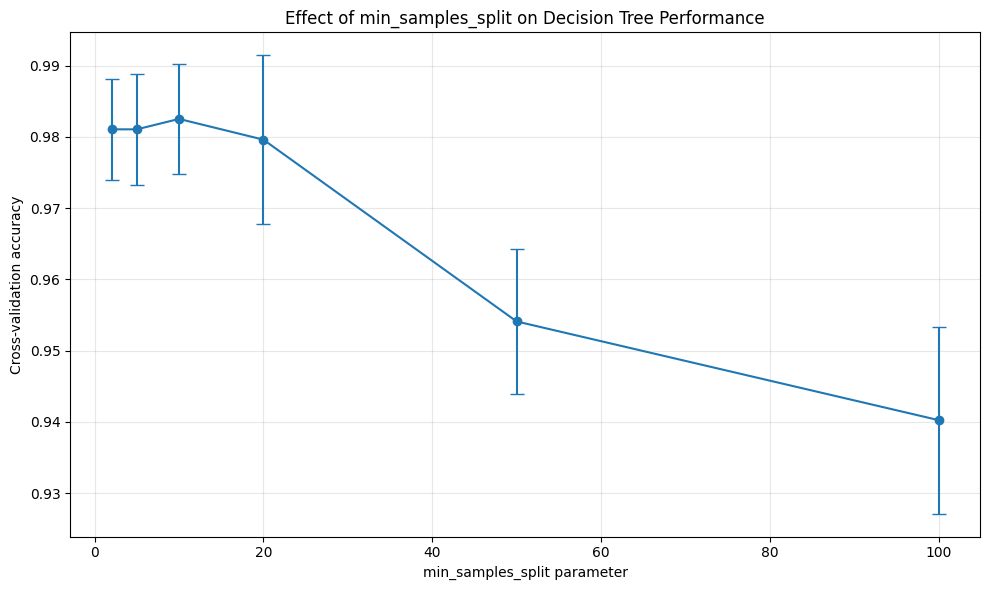

In [24]:
plt.figure(figsize=(10, 6))
plt.errorbar(min_samples_values, 
             [score[1] for score in dt_scores_by_min_samples], 
             yerr=[score[2] for score in dt_scores_by_min_samples], 
             marker='o', linestyle='-', capsize=5)
plt.xlabel('min_samples_split parameter')
plt.ylabel('Cross-validation accuracy')
plt.title('Effect of min_samples_split on Decision Tree Performance')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

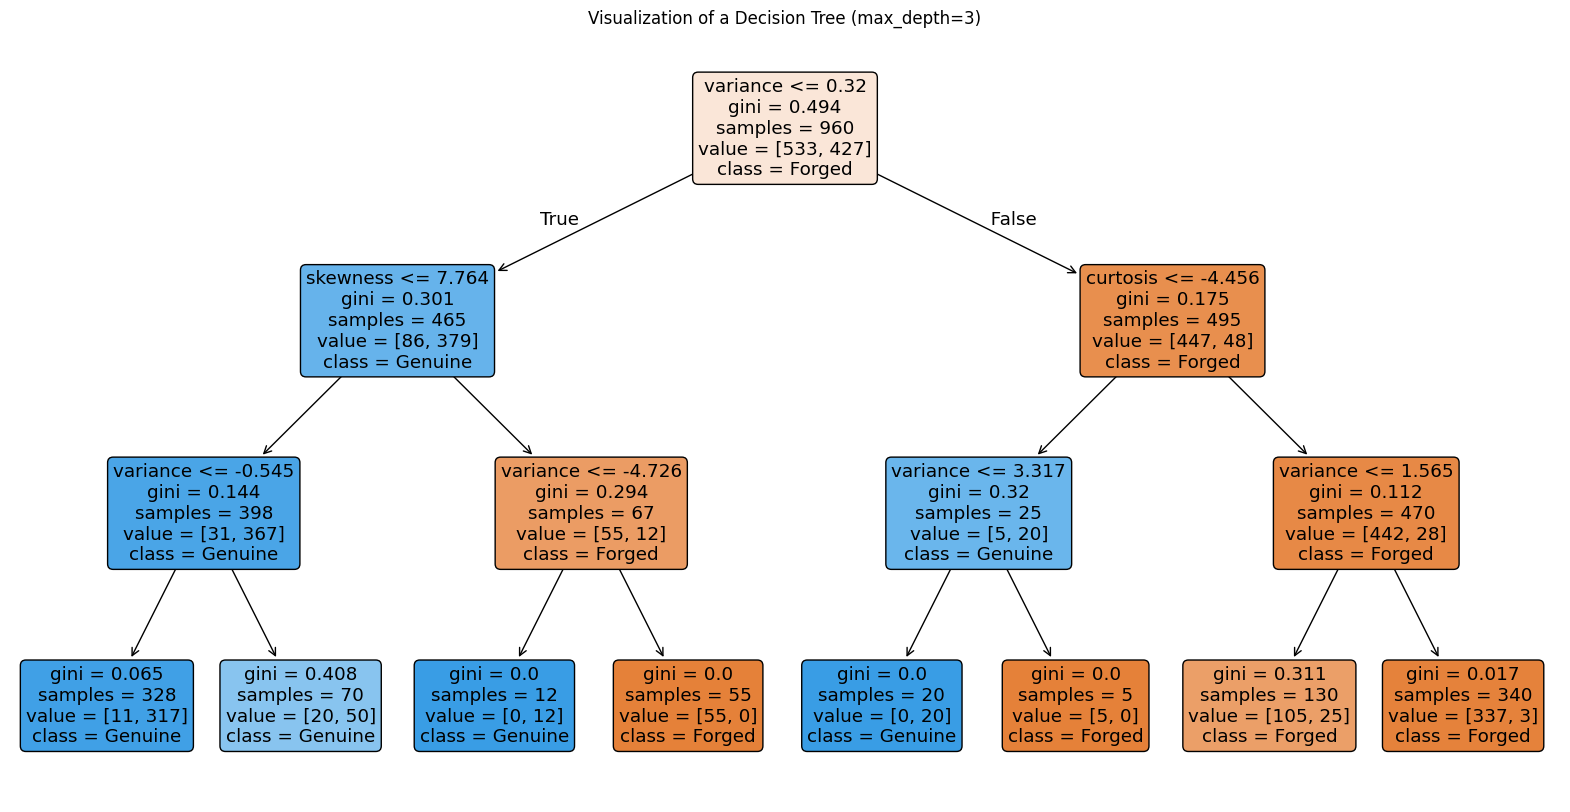

Interpretation of the tree:
- Each node shows a decision based on a feature and threshold
- Gini measures the impurity (lower is better)
- Samples show how many data points reach that node
- Value shows class distribution at that node
- The colored boxes indicate the predicted class


In [25]:
from sklearn.tree import plot_tree

# Train a shallow decision tree for better visualization
dt_viz = DecisionTreeClassifier(max_depth=3, random_state=42)
dt_viz.fit(X_train, y_train)

plt.figure(figsize=(20, 10))
plot_tree(dt_viz, filled=True, feature_names=X.columns, class_names=["Forged", "Genuine"], rounded=True)
plt.title("Visualization of a Decision Tree (max_depth=3)")
plt.show()

print("Interpretation of the tree:")
print("- Each node shows a decision based on a feature and threshold")
print("- Gini measures the impurity (lower is better)")
print("- Samples show how many data points reach that node")
print("- Value shows class distribution at that node")
print("- The colored boxes indicate the predicted class")

# 10. Go Back to Other Labs

See how RandomForests do with the Breast Cancer Data Set and with the Colour Data Set

In [16]:
colour_data = pd.read_csv("colour-data.csv")
colour_data.head()

FileNotFoundError: [Errno 2] No such file or directory: 'colour-data.csv'